# Assignment 2
## Predict Students Dropout and Academic Success

### Imports

In [143]:
import warnings
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing._target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report)
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold


warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

### Exploratory Data Analysis

In [144]:
df = pd.read_csv('data.csv', sep=';')

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [145]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Check for missing values

In [146]:
df.info()
# df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [147]:
df.shape

(4424, 37)

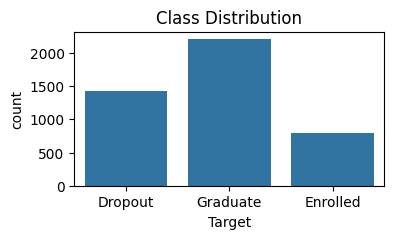

In [148]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Target')
plt.title('Class Distribution')
plt.show()

In [149]:
df_continous = df.select_dtypes(include=["float64"])
df_continous.head()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79


In [150]:
df_continous.describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206,11.566139,1.228029,0.001969
std,13.188332,14.482001,4.843663,5.210808,2.663850,1.382711,2.269935
min,95.000000,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,13.400000,13.333333,13.900000,2.600000,1.790000
max,190.000000,190.000000,18.875000,18.571429,16.200000,3.700000,3.510000


In [151]:
df_categorical = df.select_dtypes(include=["int64"])
df_categorical.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
0,1,17,5,171,1,1,1,19,12,5,...,0,0,0,0,0,0,0,0,0,0
1,1,15,1,9254,1,1,1,1,3,3,...,0,6,6,6,0,0,6,6,6,0
2,1,1,5,9070,1,1,1,37,37,9,...,0,6,0,0,0,0,6,0,0,0
3,1,17,2,9773,1,1,1,38,37,5,...,0,6,8,6,0,0,6,10,5,0
4,2,39,1,8014,0,1,1,37,38,9,...,0,6,9,5,0,0,6,6,6,0


Numerical values, continous 

In [152]:
numerical = [cname for cname in df.columns if df[cname].dtypes in ['float64']]
numerical

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

Categorical, divided in two categories, binary and nonbinary. Binary are ones represented by 0 or 1, things like Gender and Displaced student. Nonbinary are categorical values that can be treated as numerical, some have elevated number of values.

In [153]:
categorical = [col for col in df.columns if df[col].dtypes in ['int64']]
# categorical = df._get_numeric_data().columns
# categorical

categorical_binary = [col for col in categorical if set(df[col].dropna().unique()).issubset({0,1})]
print(categorical_binary)

categorical_nonbinary = [col for col in categorical if col not in categorical_binary]
print(categorical_nonbinary)


['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


Numerical Histograms

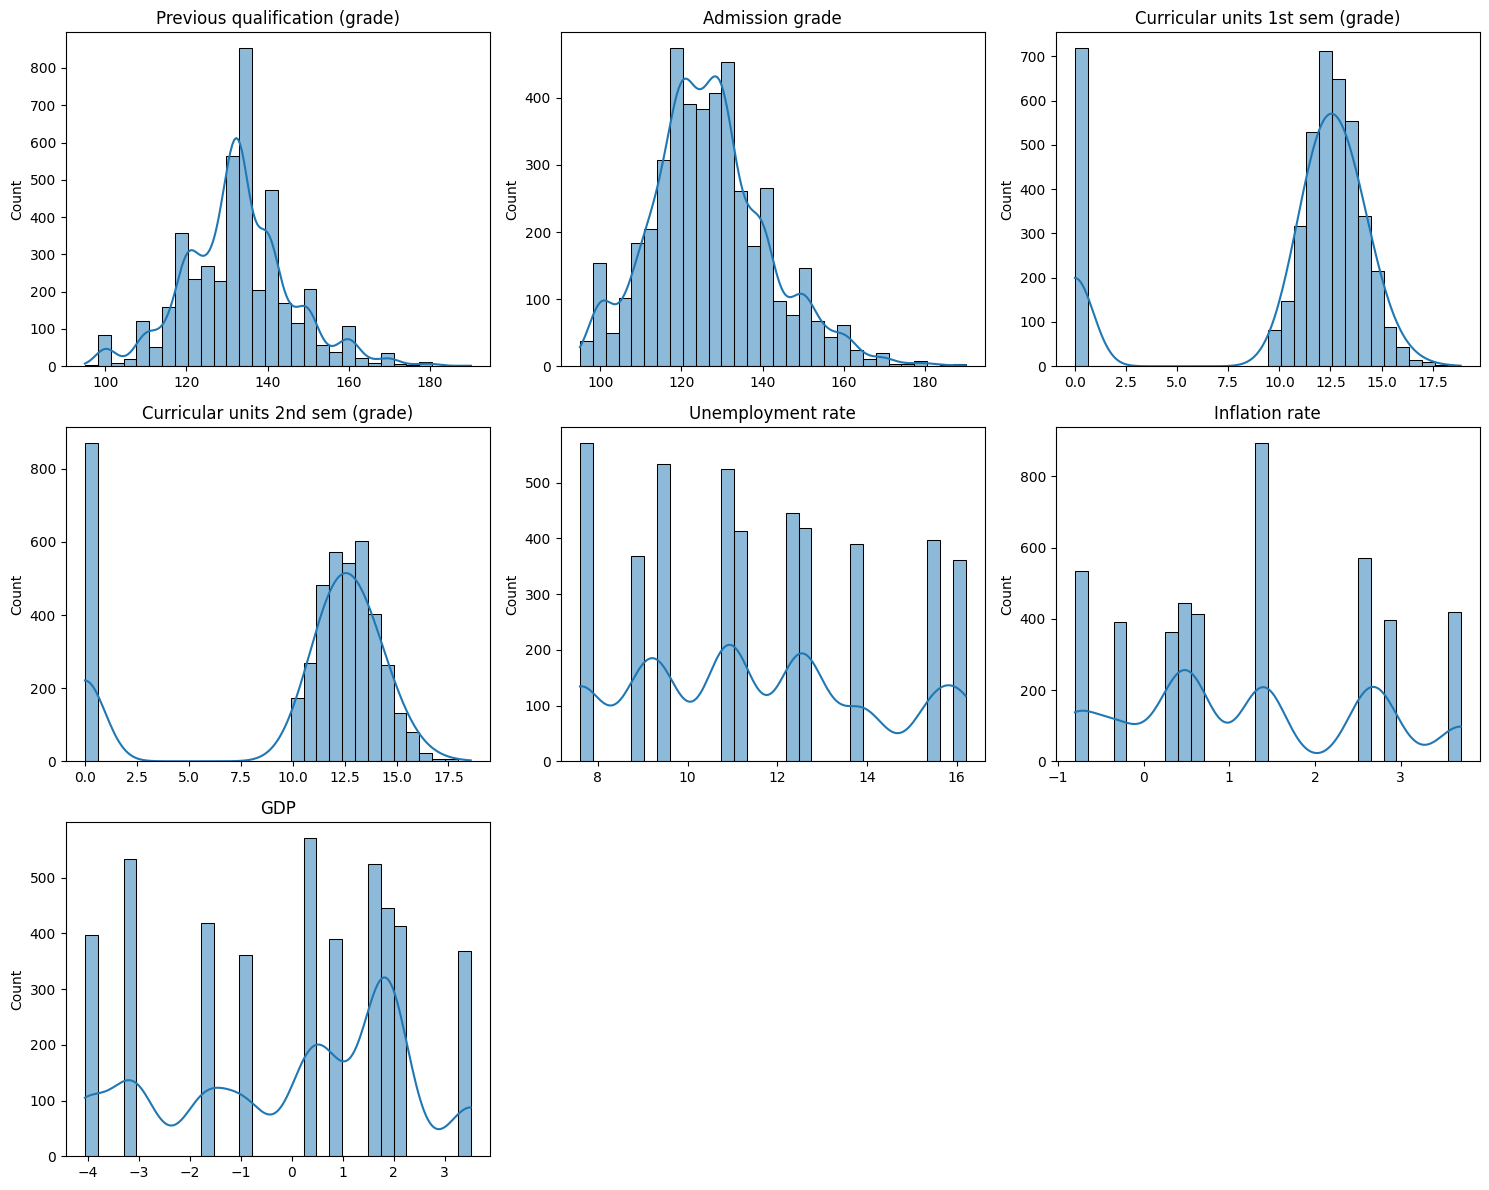

In [154]:
n_cols = 3
n_feats = len(numerical)
n_rows = (n_feats + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  

for idx, col in enumerate(numerical):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')

# turn off any unused subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

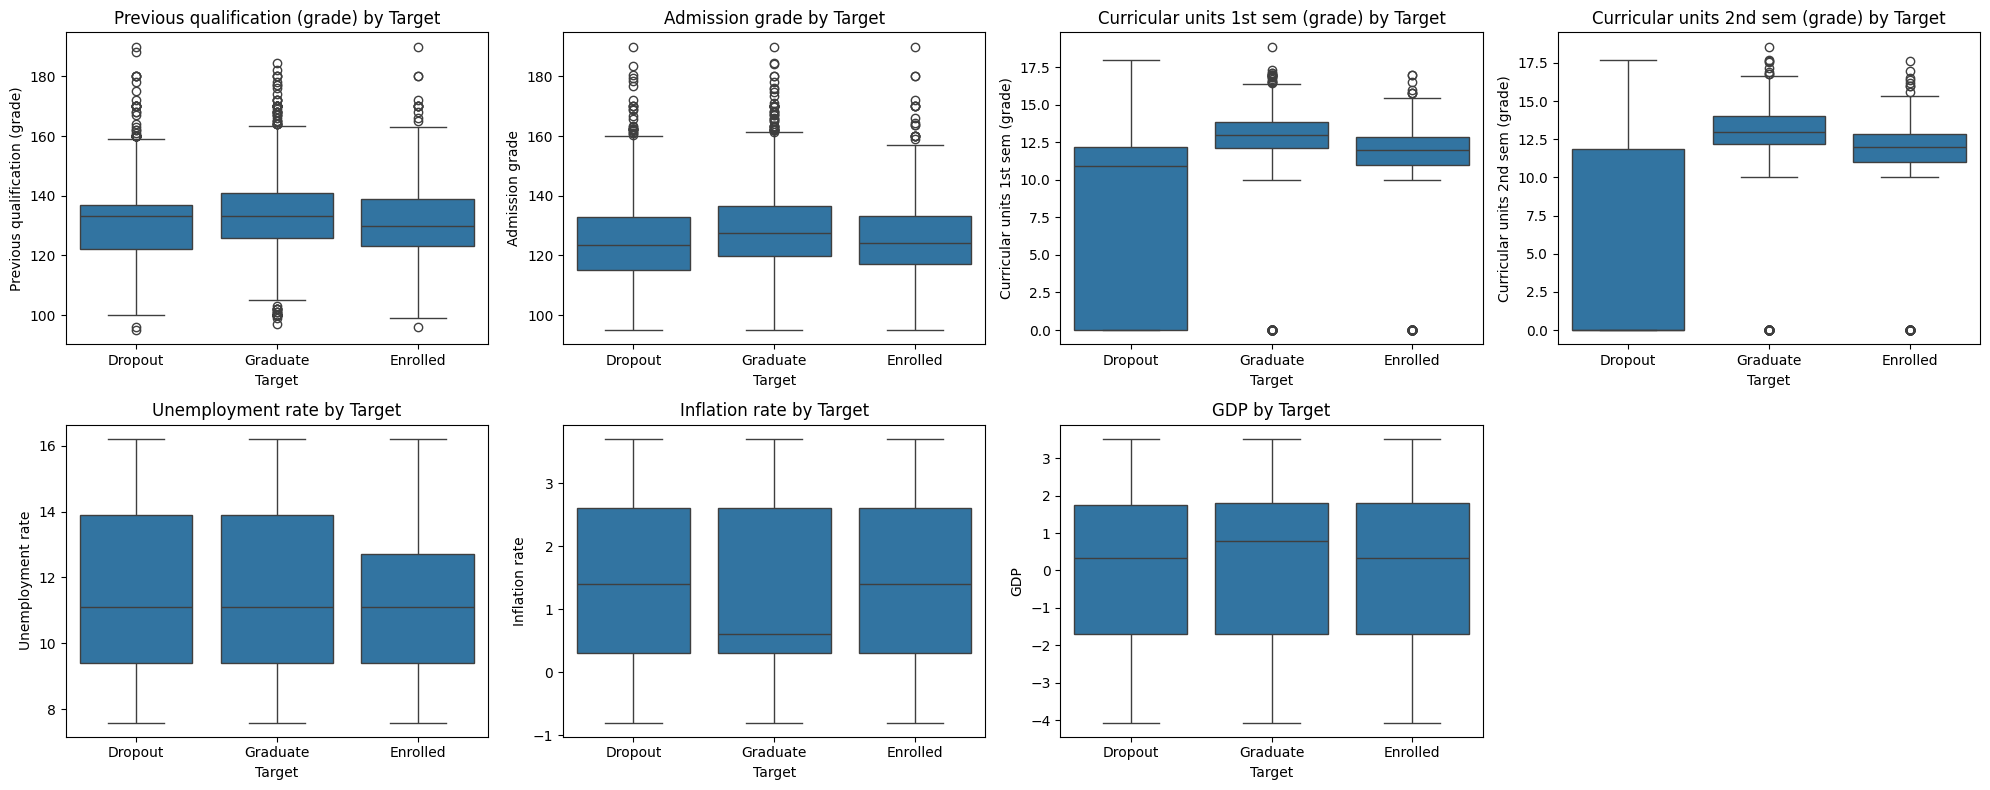

In [155]:
target_var = 'Target'

n_cols = 4
n_feats = len(numerical)
n_rows = (n_feats + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  

# for idx, col in enumerate(numerical):
#     sns.boxplot(y=df[col],ax=axes[idx],orient='v')
#     axes[idx].set_title(col)
#     axes[idx].set_xlabel('')
#     axes[idx].set_ylabel('Count')

for idx, y_var in enumerate(numerical):
    sns.boxplot(
        x=df[target_var],
        y=df[y_var],
        ax=axes[idx]
    )
    axes[idx].set_title(f'{y_var} by {target_var}')
    axes[idx].set_xlabel(target_var)
    axes[idx].set_ylabel(y_var)

# turn off any unused subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Correlation heatmap

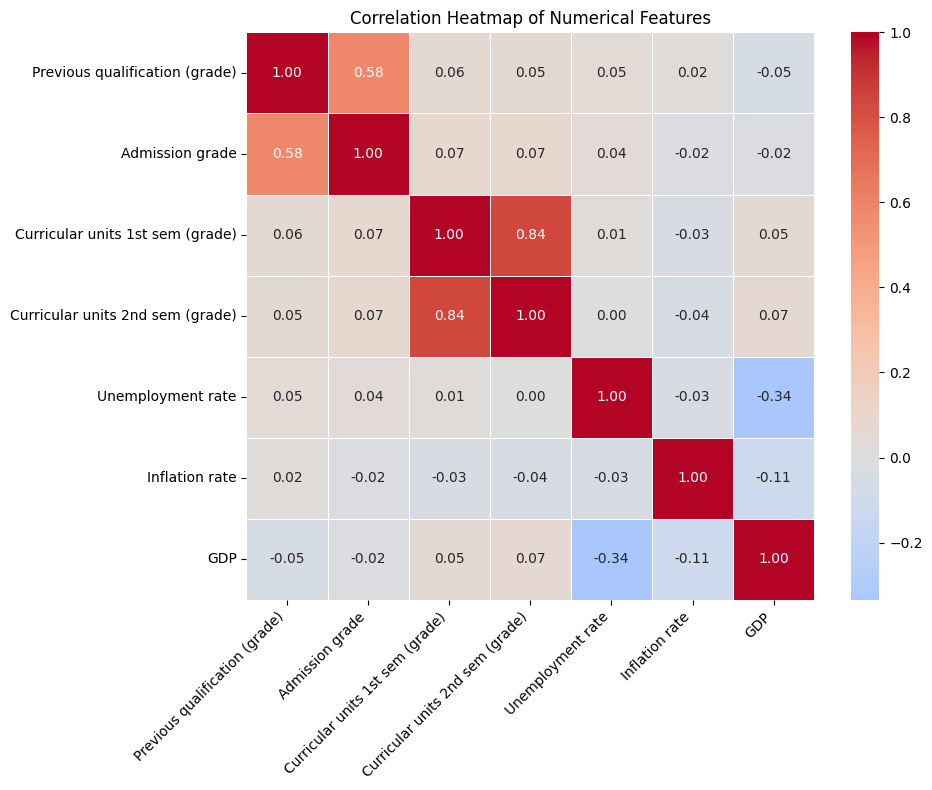

In [156]:
# corr = df.corr()[['Target']].sort_values(by='Target', ascending=False)
corr = df[numerical].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        
    fmt=".2f",         
    cmap="coolwarm",   
    center=0,          
    square=True,      
    linewidths=0.5    
)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Scatterplot for highly correlated numerical features

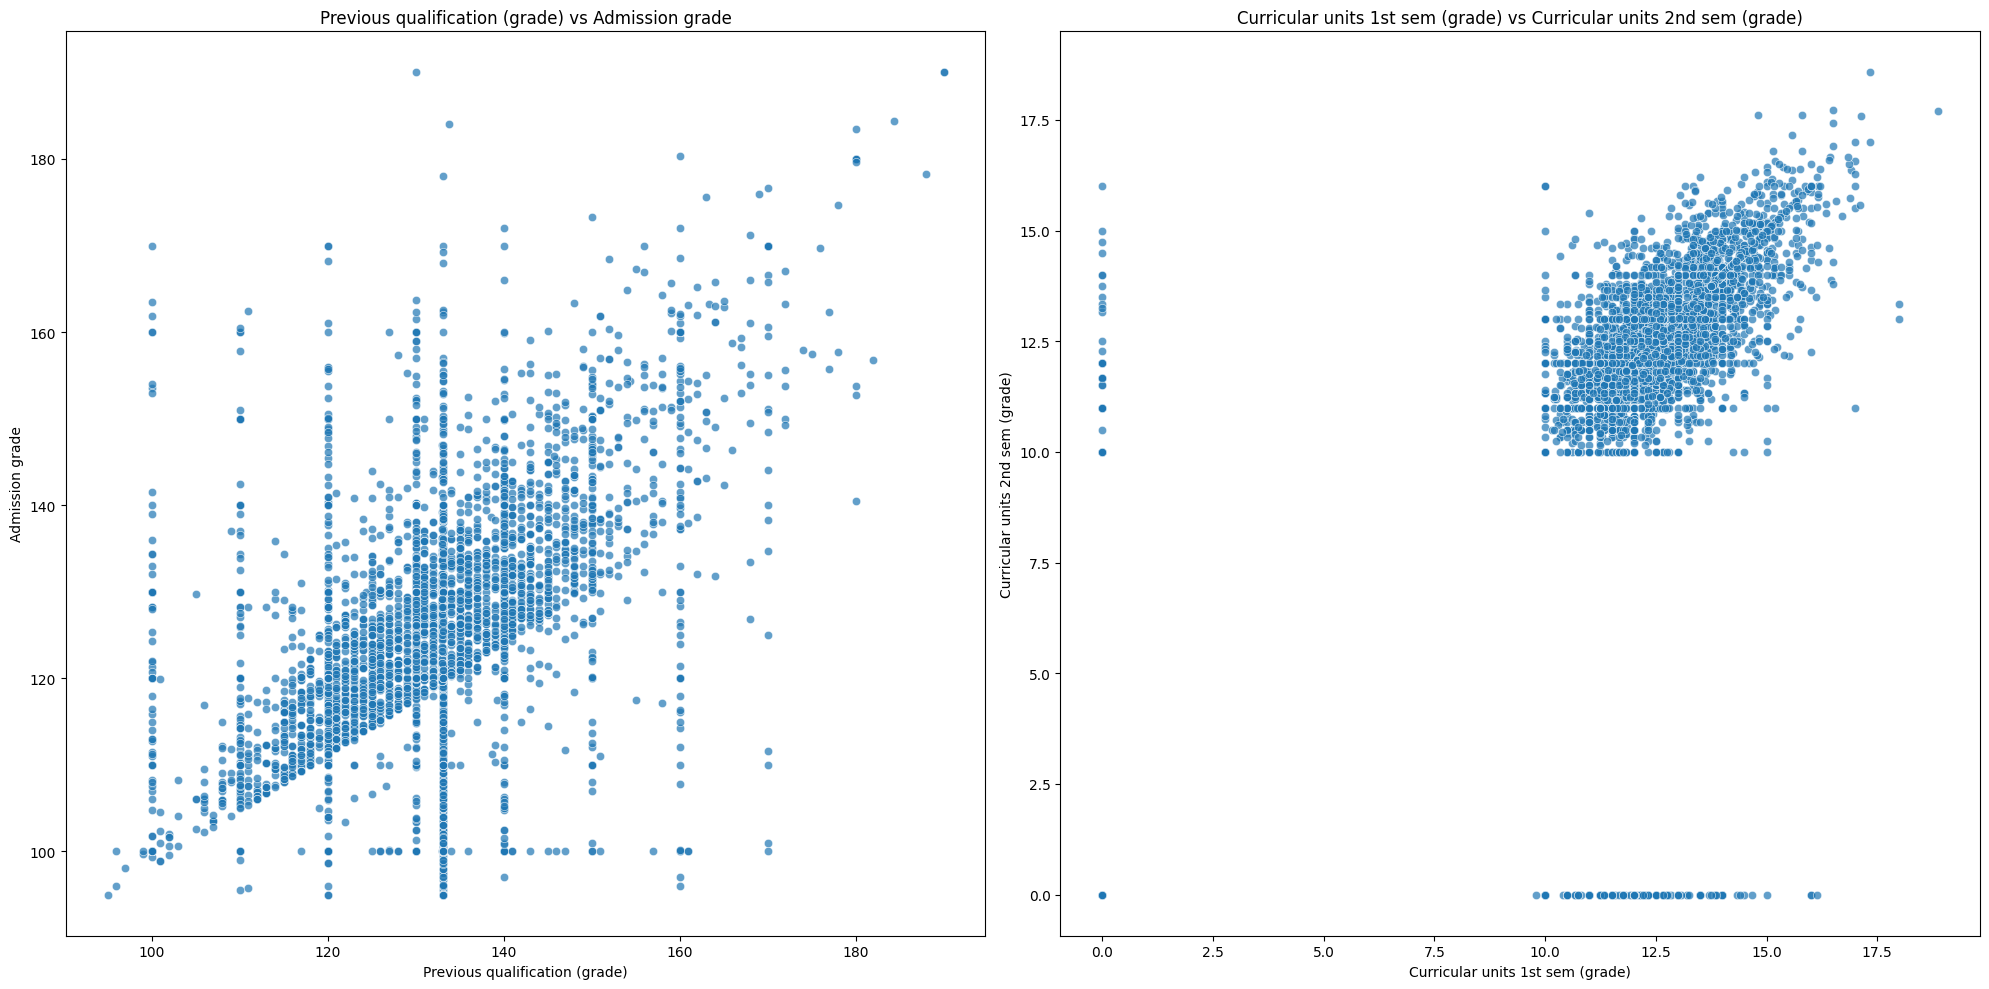

In [157]:
correlated_pairs = [
    ("Previous qualification (grade)", "Admission grade"),
    ("Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)")
]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for ax, (x_col, y_col) in zip(axes, correlated_pairs):
    sns.scatterplot(
        x=df[x_col],
        y=df[y_col],
        ax=ax,
        alpha=0.7
    )
    ax.set_title(f"{x_col} vs {y_col}")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.tight_layout()
plt.show()

Categorical binary bar plot

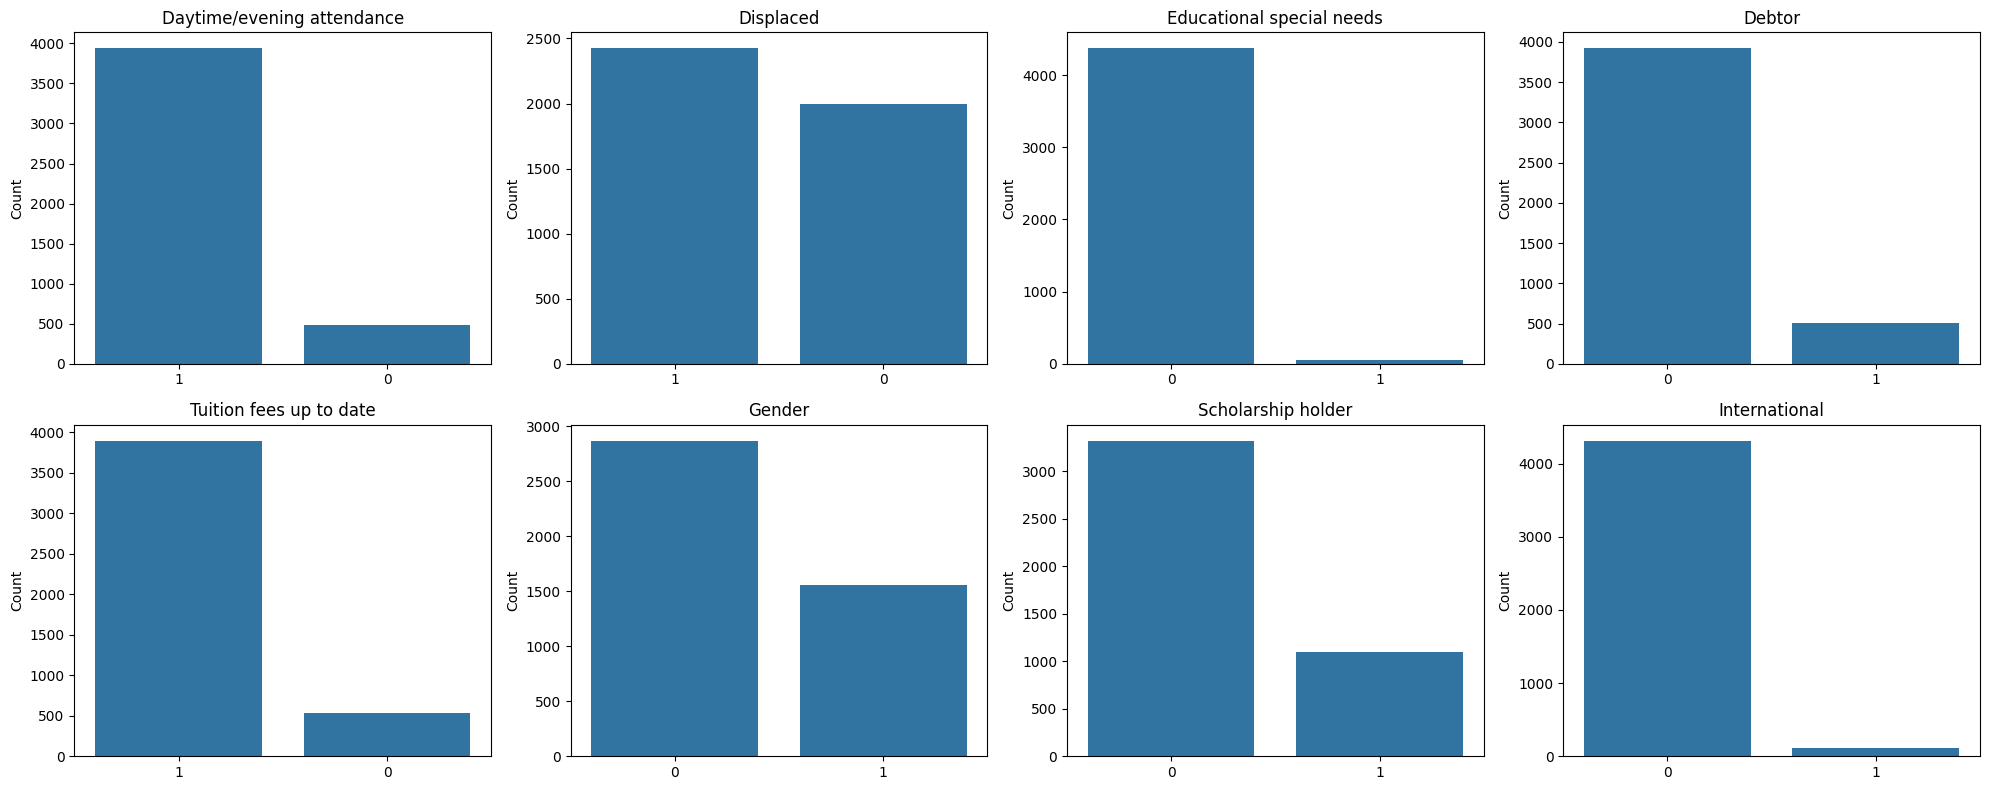

In [158]:
n_cols = 4
n_feats = len(categorical_binary)
n_rows = (n_feats + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  

for idx, col in enumerate(categorical_binary):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')

# turn off any unused subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Categorical non binary bar plot

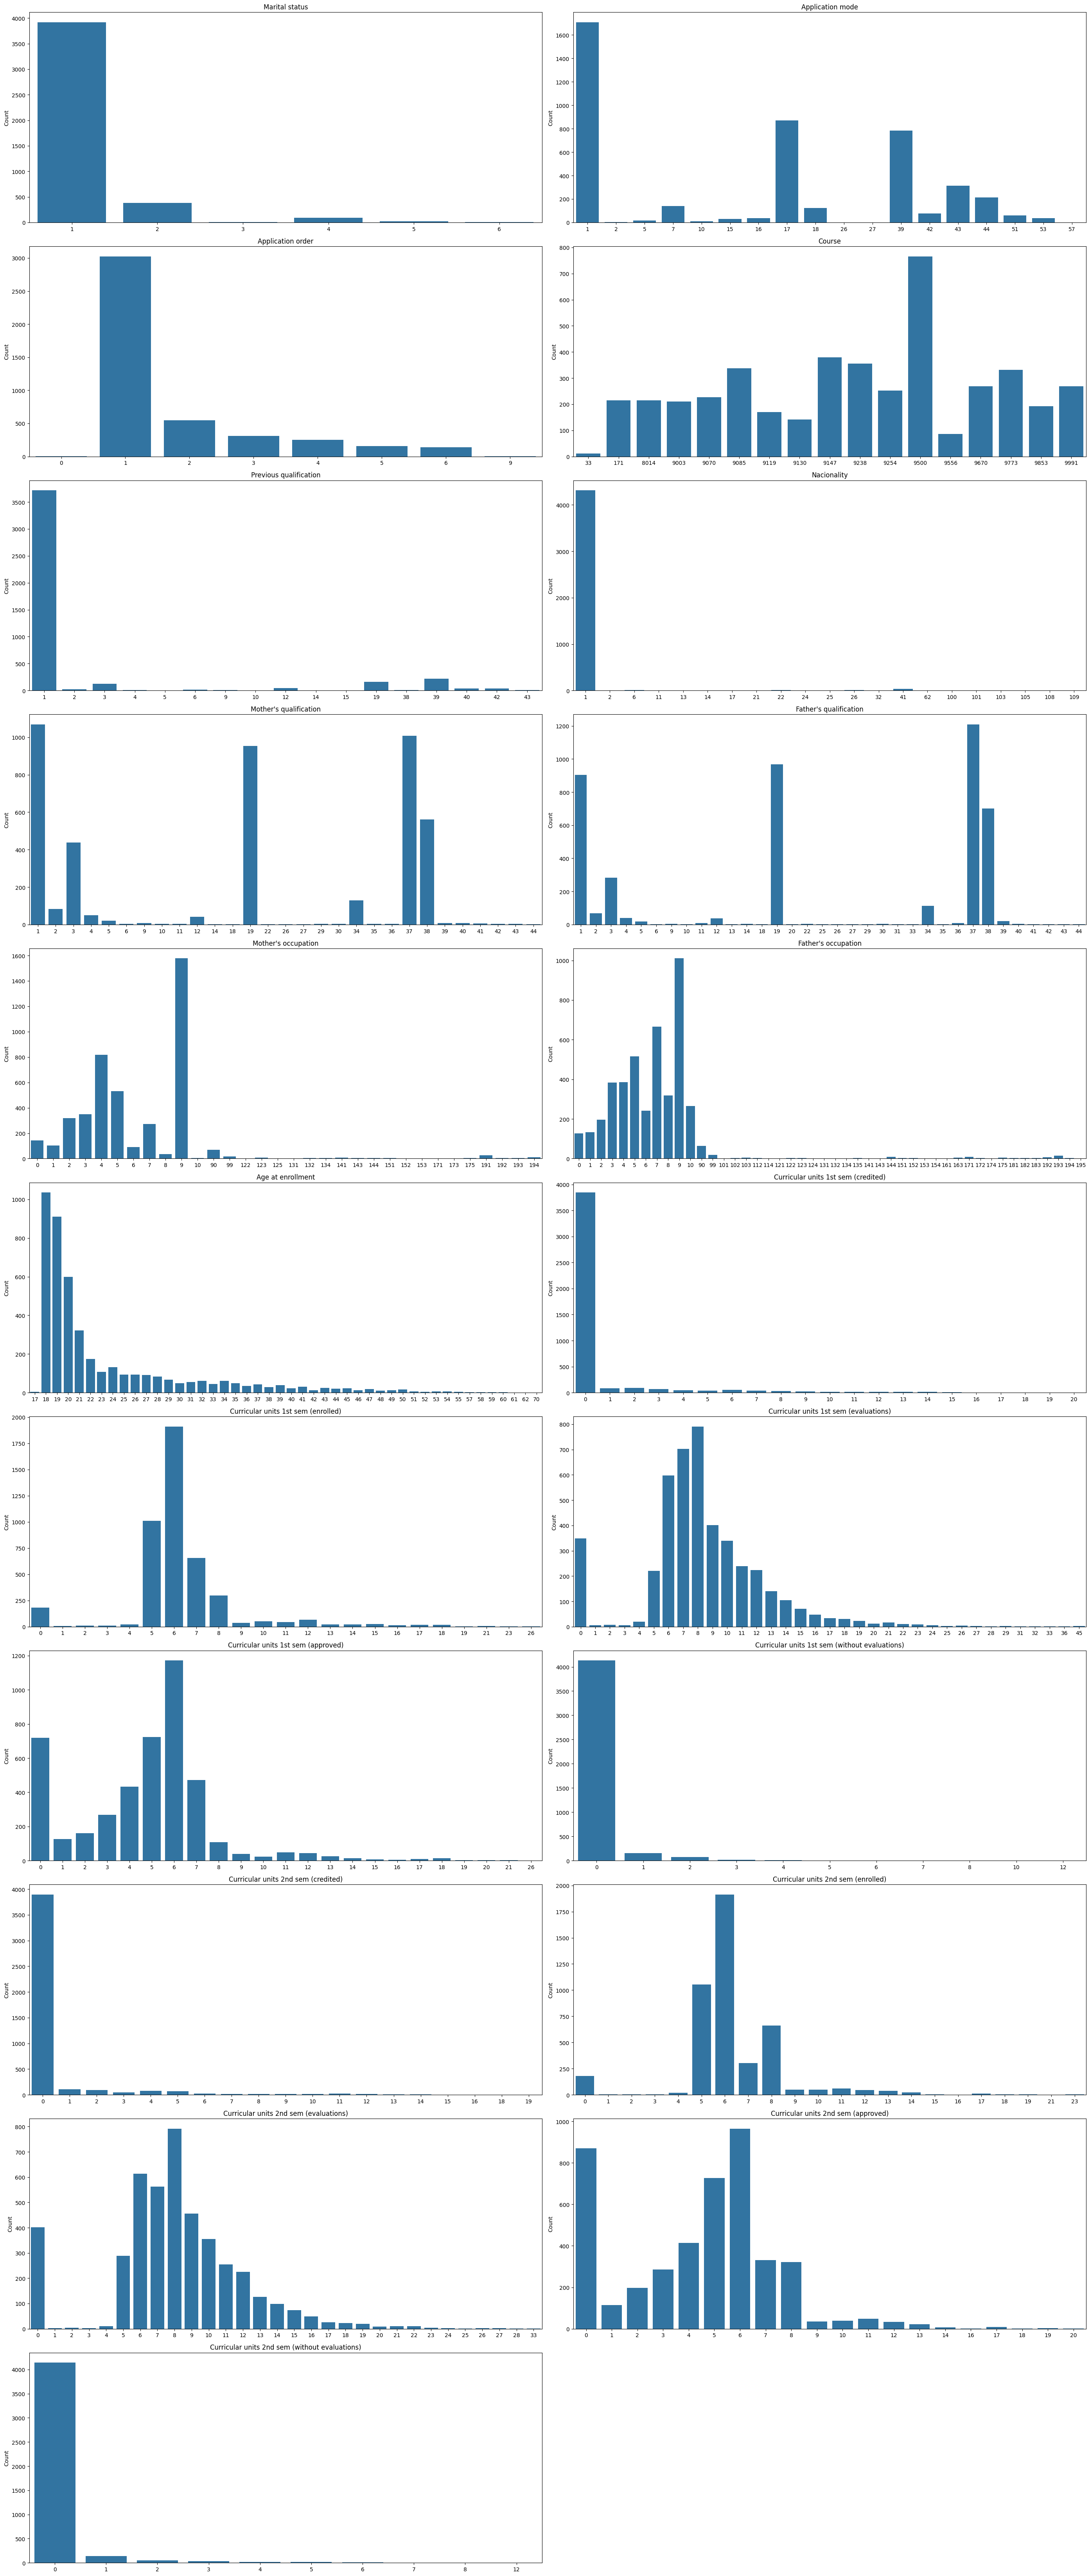

In [159]:
n_cols = 2
n_feats = len(categorical_nonbinary)
n_rows = (n_feats + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14*n_cols, 6*n_rows))
axes = axes.flatten()  

# for idx, col in enumerate(categorical_nonbinary):
#     sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[idx])
#     axes[idx].set_title(col)
#     axes[idx].set_xlabel('')
#     axes[idx].set_ylabel('Count')

for idx, col in enumerate(categorical_nonbinary):
    sns.countplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')

# turn off any unused subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Preprocessing

Changing Target from object into a numerical so models can read it. Changes 'Dropout', 'Enroled' and 'Graduate' into '0', '1' and '2'.

In [160]:
enc = LabelEncoder()

df['Target']= enc.fit_transform(df['Target'])

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


#### Outlier Handling

In [161]:
# we will perform outlier handling on the numerical columns, which are:
numerical

numerical_filtered = [
    col for col in numerical 
    if col not in [
        'Curricular units 1st sem (grade)', 
        'Curricular units 2nd sem (grade)'
    ]
]

numerical_filtered

['Previous qualification (grade)',
 'Admission grade',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

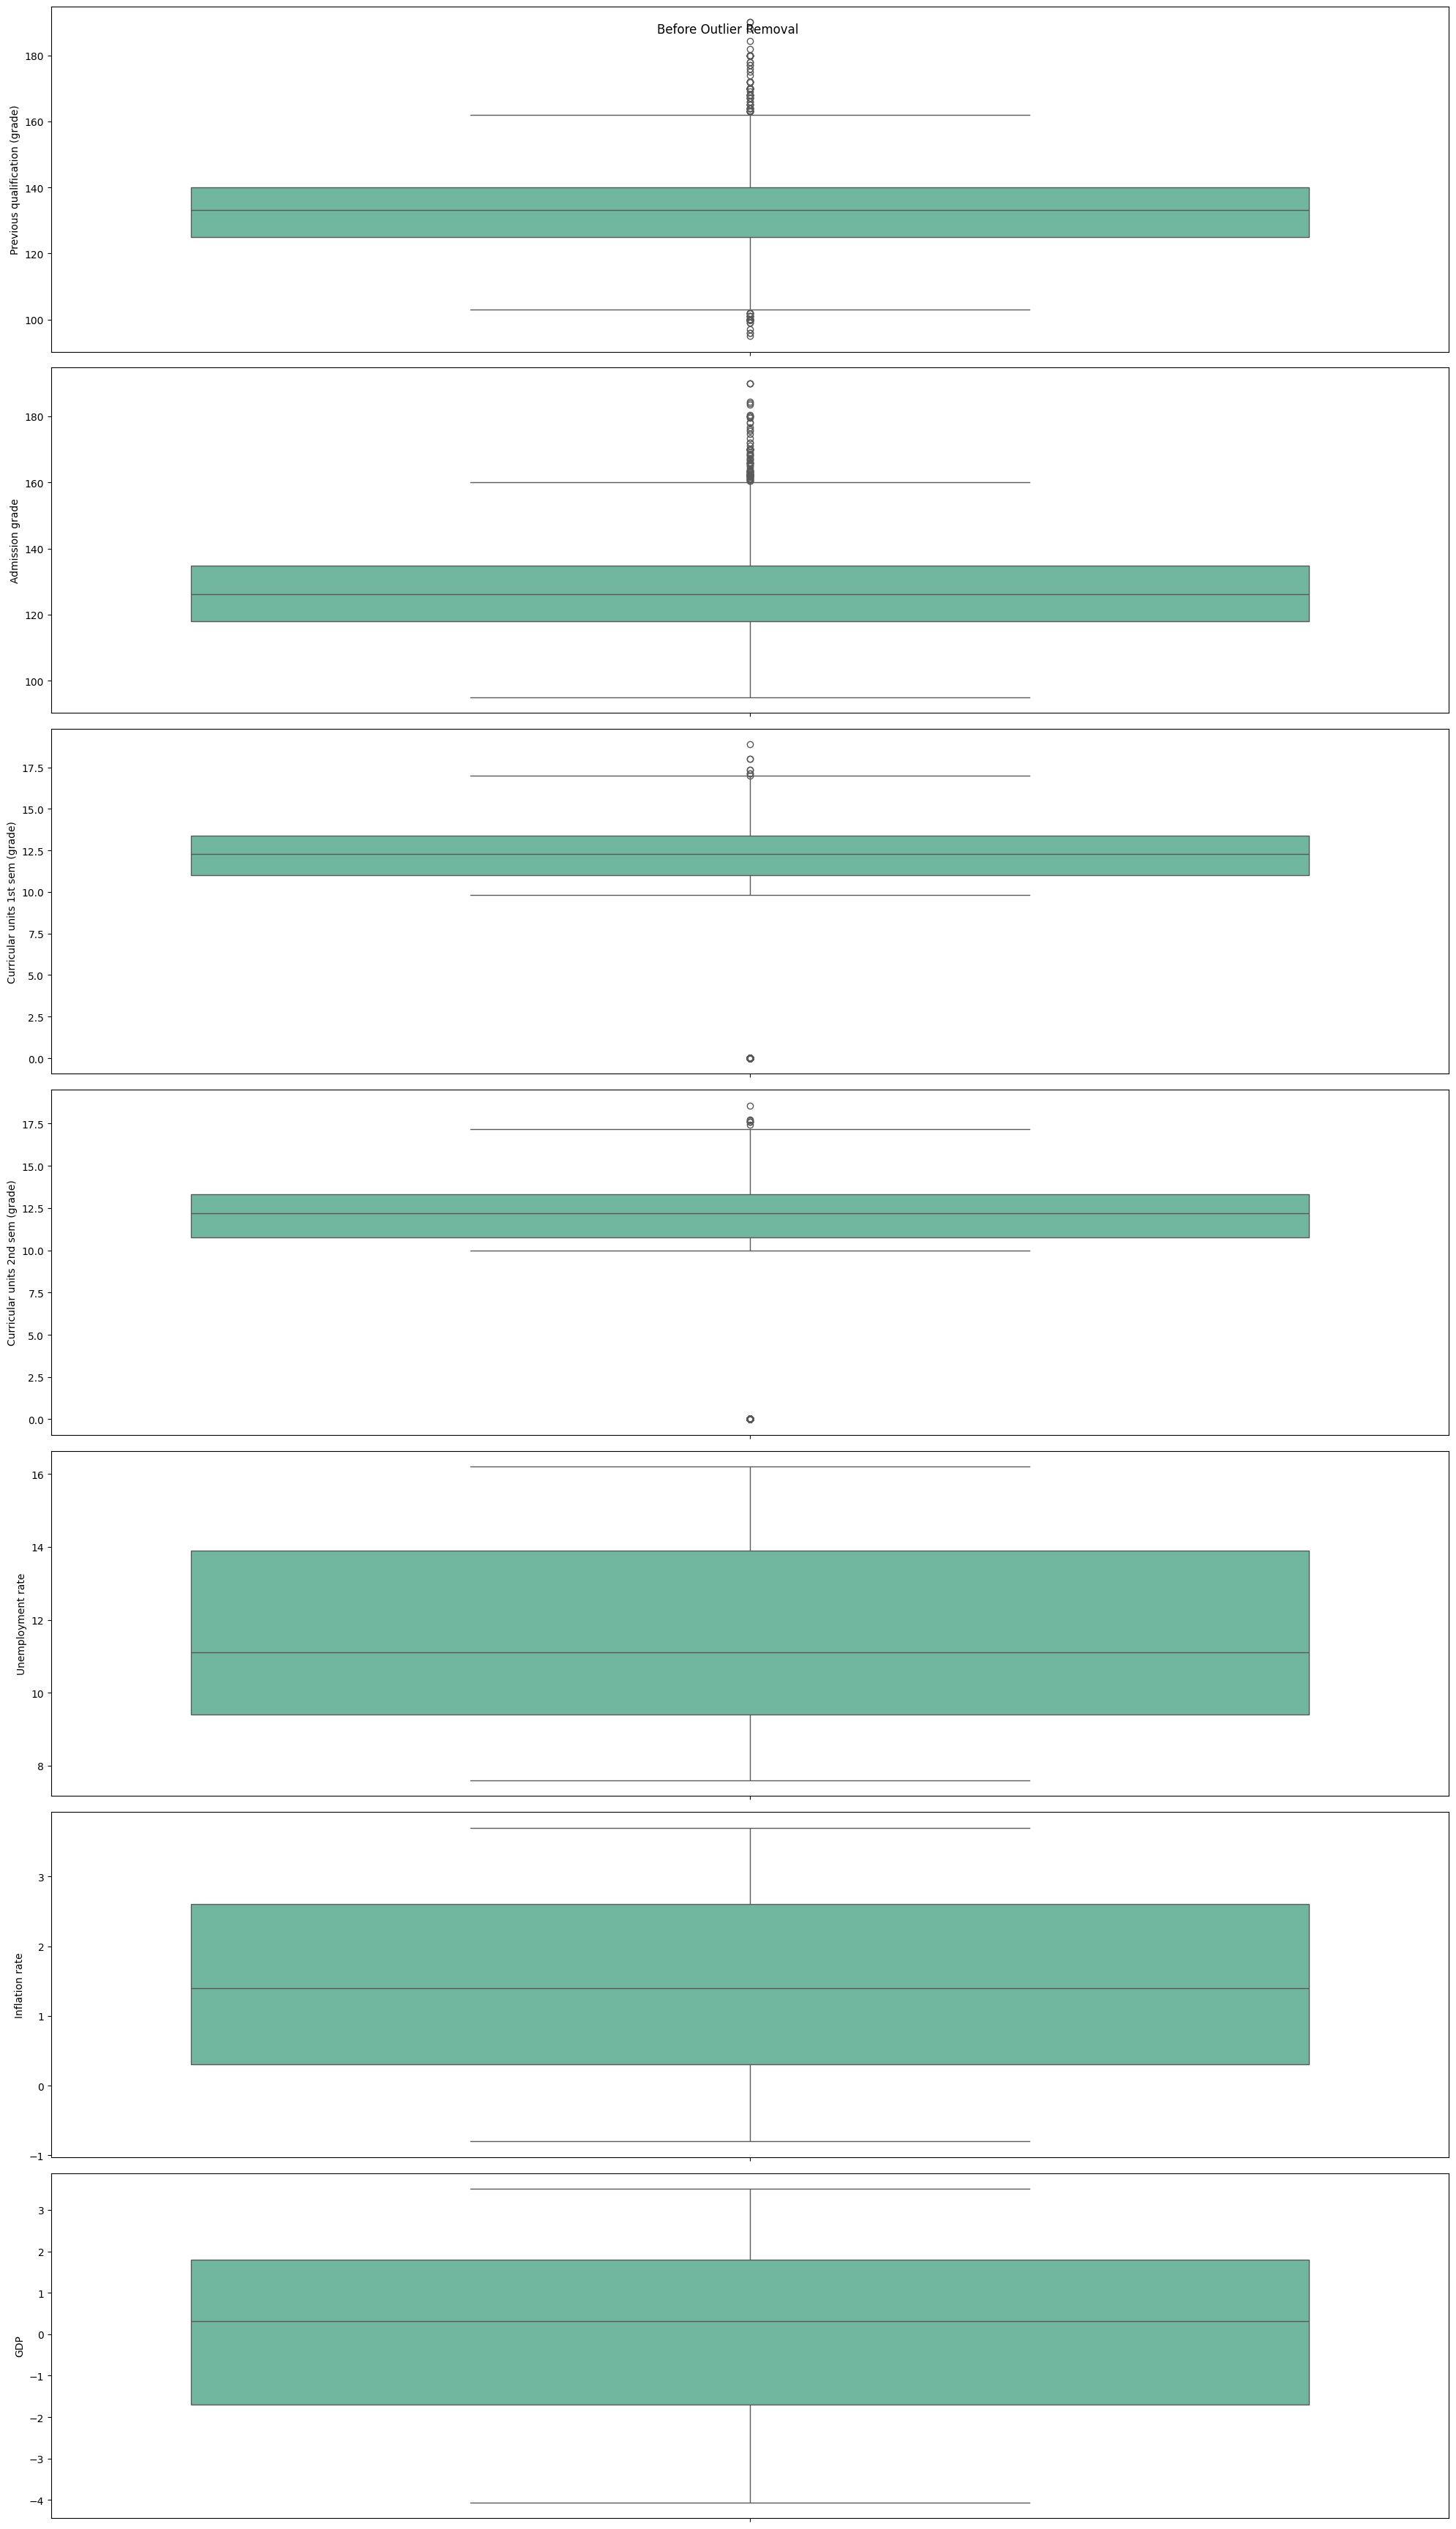

In [162]:
# Visualize boxplots before outlier handling

num_cols = len(numerical)
fig, axs = plt.subplots(num_cols, 1, figsize=(20, 5 * num_cols))
for i, col in enumerate(numerical):
    sns.boxplot(df[col], ax=axs[i], palette='BuGn')
plt.suptitle("Before Outlier Removal")
plt.tight_layout()
plt.show()

In [163]:
#Apply outlier removal

for col in numerical_filtered:
    before = df.shape[0]
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 3*IQR) & (df[col] <= Q3 + 3*IQR)]
    after = df.shape[0]
    print(f"Removed {before - after} rows for '{col}'")

Removed 3 rows for 'Previous qualification (grade)'
Removed 1 rows for 'Admission grade'
Removed 0 rows for 'Unemployment rate'
Removed 0 rows for 'Inflation rate'
Removed 0 rows for 'GDP'


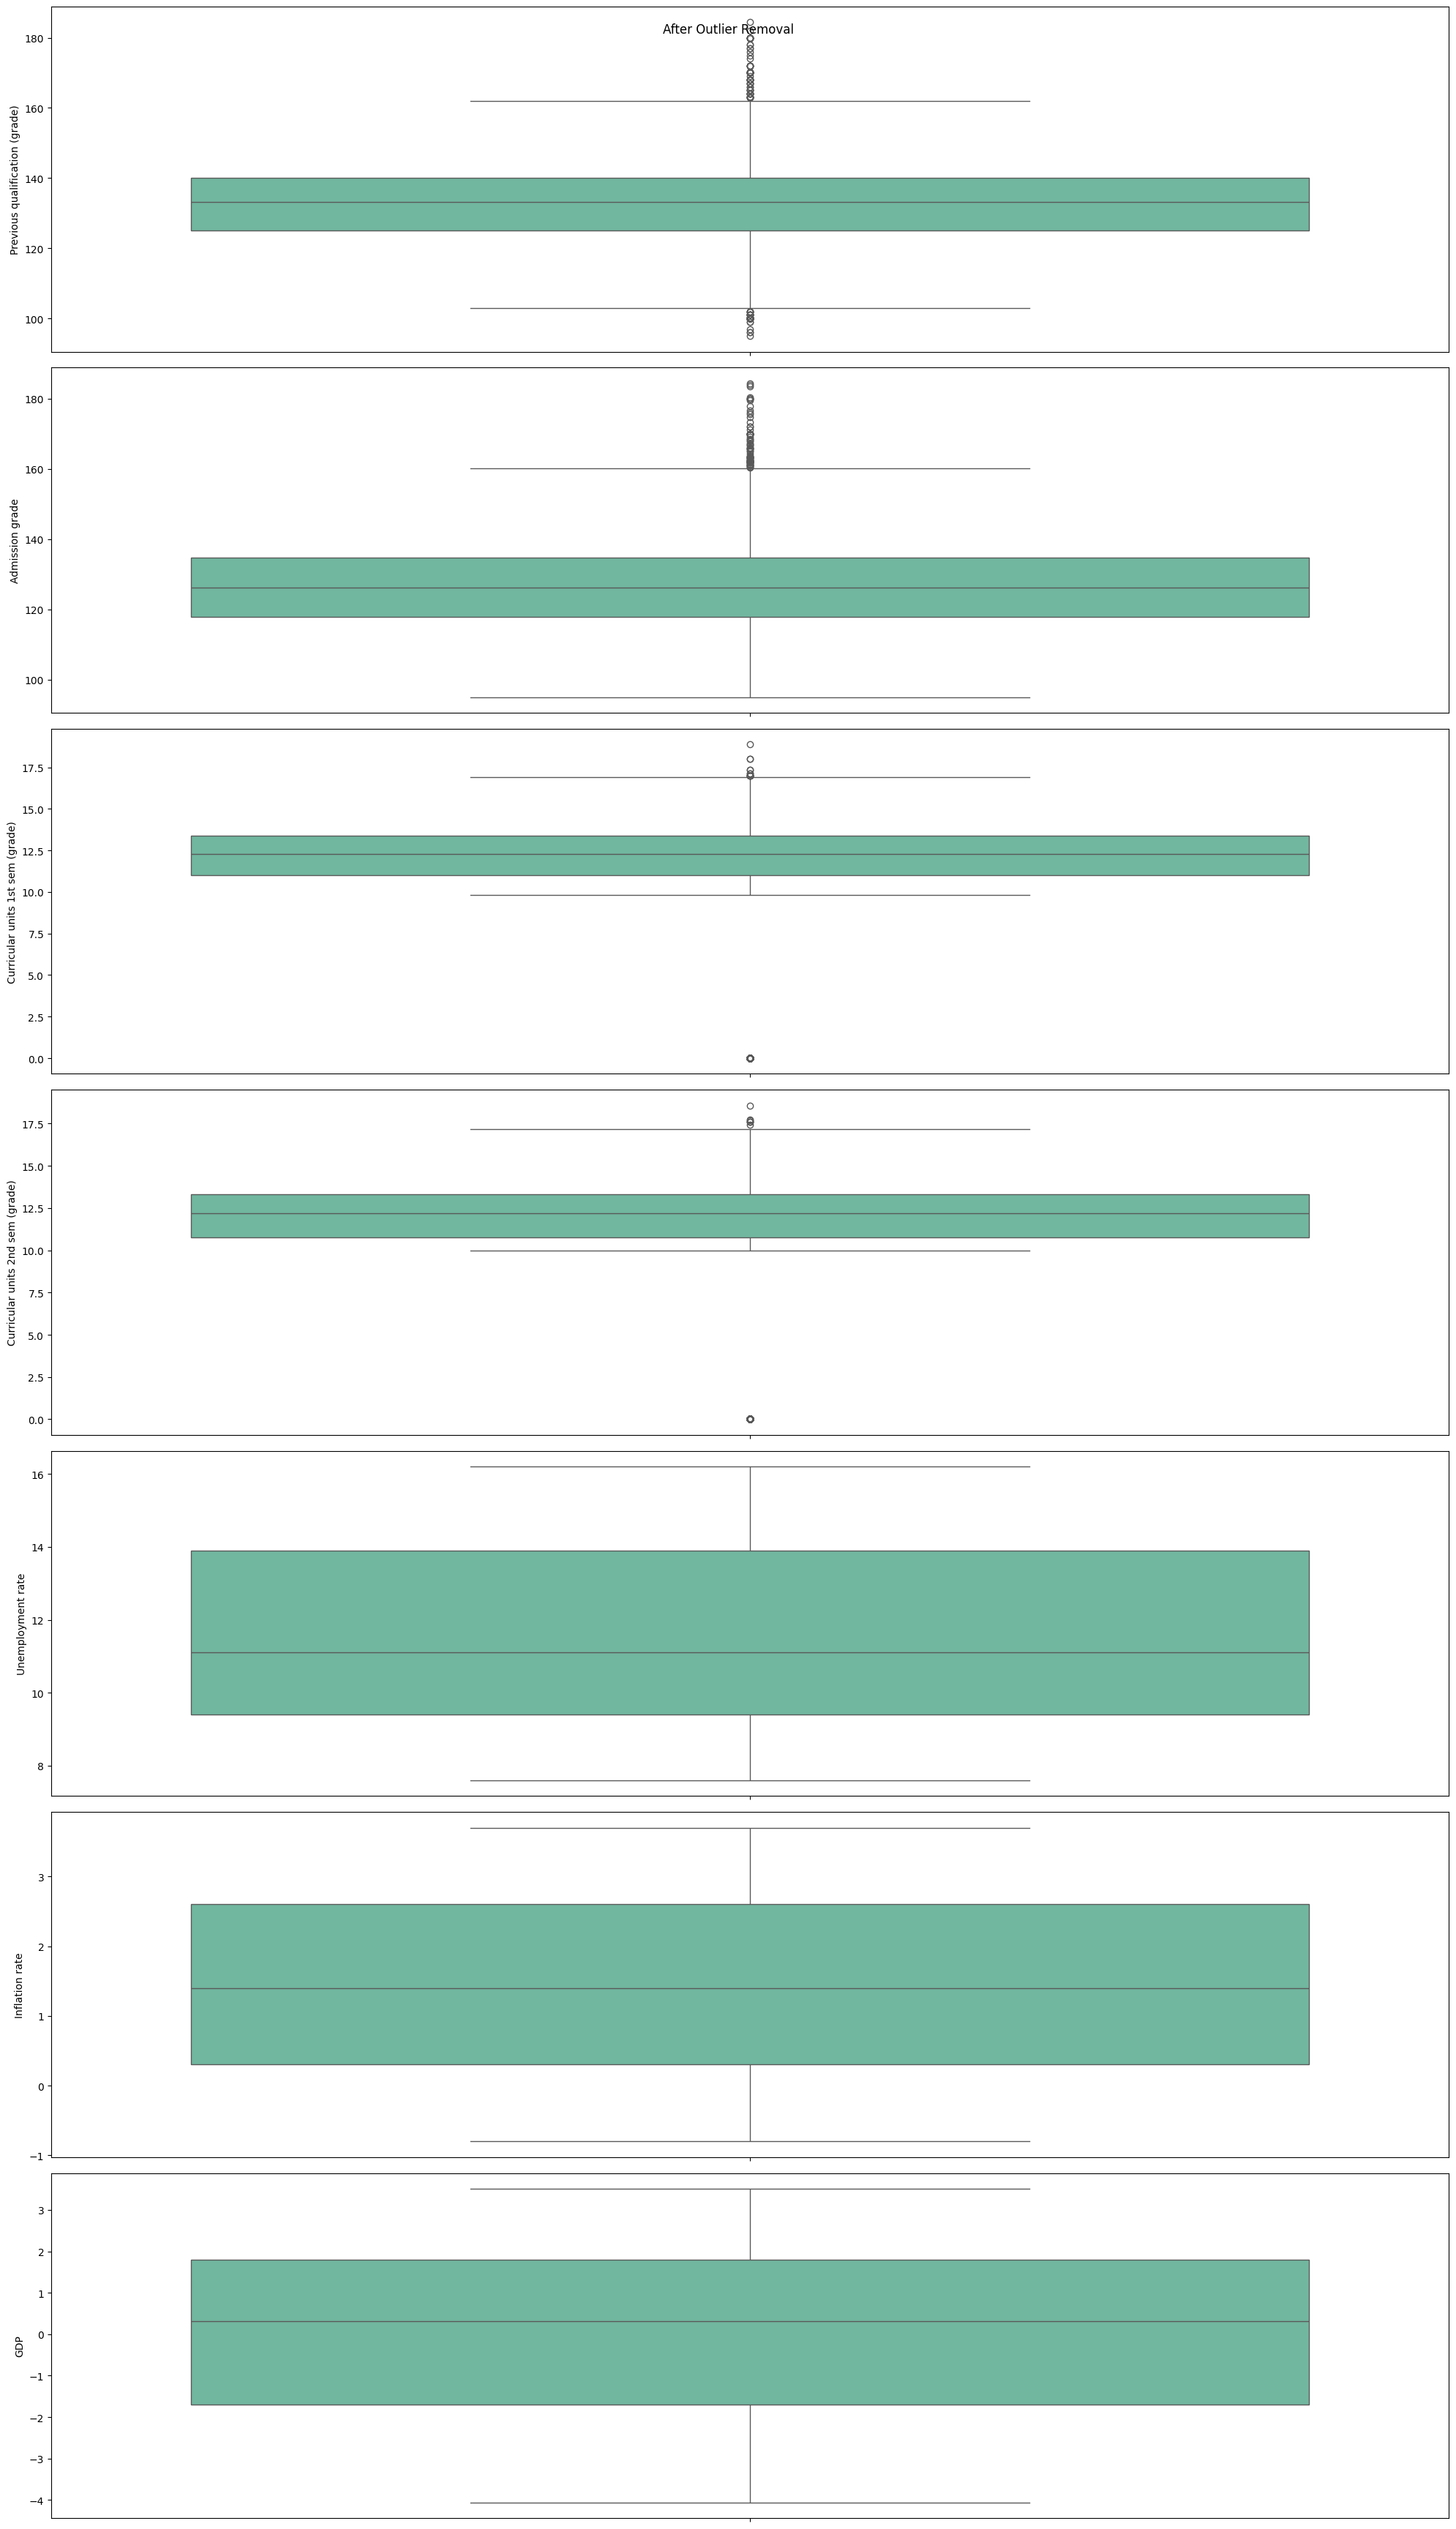

In [164]:
# Visualize boxplots after outlier handling

num_cols = len(numerical)
fig, axs = plt.subplots(num_cols, 1, figsize=(20, 5 * num_cols))
for i, col in enumerate(numerical):
    sns.boxplot(df[col], ax=axs[i], palette='BuGn')
plt.suptitle("After Outlier Removal")
plt.tight_layout()
plt.show()

#### Train/Test Split

In [165]:
X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train_str, y_test_str = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




le = LabelEncoder()
le.fit(y_train_str)                    
y_train = le.transform(y_train_str)    
y_test  = le.transform(y_test_str)

#### Feature Selection

In [166]:
# --- Feature Selection: Remove highly correlated numerical features ---
corr_matrix = X_train[numerical].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
numerical = [col for col in numerical if col not in to_drop]
print("Removed due to high correlation:", to_drop)

Removed due to high correlation: []


In [167]:
# Remove low-variance features (for numerical columns)

selector = VarianceThreshold(threshold=0.01)
low_variance_cols = [col for col, var in zip(numerical, selector.fit(X_train[numerical]).variances_) if var < 0.1]
numerical = [col for col in numerical if col not in low_variance_cols]
print("Removed due to low variance:", low_variance_cols)

Removed due to low variance: []


In this case, no features were removed due to high correlation or low-variance.

##### Chi-Square Test

In [168]:
chi2_result = chi2(X_train[categorical], y_train)

chi_scores = pd.Series(chi2_result[0], categorical)
p_values = pd.Series(chi2_result[1], categorical)

results = pd.DataFrame({
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='p-value')

print(results)


                                                 Chi2 Score        p-value
Application mode                                3151.950952   0.000000e+00
Course                                          1553.267413   0.000000e+00
Curricular units 2nd sem (approved)             2783.181173   0.000000e+00
Curricular units 1st sem (approved)             1981.069067   0.000000e+00
Mother's occupation                             1421.935612  1.700611e-309
Father's occupation                             1217.033050  5.304336e-265
Age at enrollment                                602.412178  1.541195e-131
Previous qualification                           279.779686   1.764466e-61
Scholarship holder                               244.755422   7.112715e-54
Curricular units 2nd sem (evaluations)           229.827989   1.240185e-50
Debtor                                           203.489435   6.498761e-45
Mother's qualification                           180.893903   5.240686e-40
Gender                   

###### Chi-Square Test of Independence:
The Chi-Square Test of Independence is used to determine whether there is a significant relationship between a categorical input feature and the target variable.

- **If p-value ≥ 0.05**  
  → We **fail to reject** the null hypothesis.  
  → This means there is **no statistically significant relationship** between the feature and the target variable.  
  → Therefore, these variables can be ignored, as they are irrelevant for the task at hand.

- **If p-value < 0.05**  
  → We **reject** the null hypothesis.  
  → This indicates a **statistically significant relationship** — the feature is likely associated with the target variable.  
  → Therefore, these variables **cannot** be ignored, as they are **not** irrelevant for the task at hand.

In [169]:
# Analyze the NULL HYPOTHESIS

null_cols=[]
significance_level = 0.05
for i in p_values.index:
    if p_values[i] <= significance_level: 
        print(i,'        → REJECT NULL HYPOTHESIS') 
    else: 
        print(i,'        → ACCEPT NULL HYPOTHESIS')
        null_cols.append(i)

Marital status         → REJECT NULL HYPOTHESIS
Application mode         → REJECT NULL HYPOTHESIS
Application order         → REJECT NULL HYPOTHESIS
Course         → REJECT NULL HYPOTHESIS
Daytime/evening attendance         → ACCEPT NULL HYPOTHESIS
Previous qualification         → REJECT NULL HYPOTHESIS
Nacionality         → REJECT NULL HYPOTHESIS
Mother's qualification         → REJECT NULL HYPOTHESIS
Father's qualification         → REJECT NULL HYPOTHESIS
Mother's occupation         → REJECT NULL HYPOTHESIS
Father's occupation         → REJECT NULL HYPOTHESIS
Displaced         → REJECT NULL HYPOTHESIS
Educational special needs         → ACCEPT NULL HYPOTHESIS
Debtor         → REJECT NULL HYPOTHESIS
Tuition fees up to date         → REJECT NULL HYPOTHESIS
Gender         → REJECT NULL HYPOTHESIS
Scholarship holder         → REJECT NULL HYPOTHESIS
Age at enrollment         → REJECT NULL HYPOTHESIS
International         → ACCEPT NULL HYPOTHESIS
Curricular units 1st sem (credited)        

The collumns that can be removed are:

In [170]:
null_cols

['Daytime/evening attendance', 'Educational special needs', 'International']

In [171]:
# drop the columns that are irrelevante to the prediction 
X_train.drop(labels= null_cols, axis=1, inplace=True) 



X_train.head()

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1111,1,1,5,9500,1,126.0,1,1,19,6,...,0,0,8,10,7,13.328571,0,12.4,0.5,1.79
3788,1,44,1,9003,39,130.0,1,3,1,4,...,0,0,6,11,6,11.333333,0,12.4,0.5,1.79
2032,1,39,1,9085,1,133.1,1,19,37,9,...,0,0,6,21,4,12.250000,0,15.5,2.8,-4.06
480,1,1,1,9500,1,136.0,1,1,1,4,...,0,0,8,8,8,14.037500,0,13.9,-0.3,0.79
2985,1,17,1,9070,1,135.0,1,37,19,9,...,0,0,6,6,6,13.500000,0,12.7,3.7,-1.70


In [172]:
# After dropping those columns, we should update the subsets we created earlier, as they are going to be relevant again

numerical = [cname for cname in X_train.columns if X_train[cname].dtypes in ['float64']]
categorical = [col for col in X_train.columns if X_train[col].dtypes in ['int64']]

categorical_binary = [col for col in categorical if set(X_train[col].dropna().unique()).issubset({0,1})]
categorical_nonbinary = [col for col in categorical if col not in categorical_binary]

In [173]:
preprocessor = ColumnTransformer([
    # 1) Scale continuous numeric features
    ("num", StandardScaler(), numerical),

    # 2) Pass through true binary flags untouched
    ("binary", "passthrough", categorical_binary),

    # 3) One‐hot encode Application mode (few levels)
    ("app_mode_ohe",
     OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
     ["Application mode"]),

    # 4) Target‐encode Course (high cardinality)
    ("course_te",
     TargetEncoder(),
     ["Course"]),

    # 5) One‐hot encode any other moderate‐cardinality categoricals
    ("other_cat_ohe",
     OneHotEncoder(handle_unknown='ignore', sparse_output=False),
     categorical_nonbinary),
])

In [174]:
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [175]:
pd.Series(y_train).value_counts(), pd.Series(y_test).value_counts()

(2    1767
 1    1767
 0    1767
 Name: count, dtype: int64,
 2    441
 0    284
 1    159
 Name: count, dtype: int64)

In [176]:
models = {
    "Decision Tree":   Pipeline([("preprocessor", preprocessor), ("clf", DecisionTreeClassifier(random_state=42))]),
    "k-NN":            Pipeline([("preprocessor", preprocessor), ("clf", KNeighborsClassifier(n_neighbors=5))]),
    "Neural Network":  Pipeline([("preprocessor", preprocessor), ("clf", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4424, 36), random_state=42))]),
    "SVM":             Pipeline([("preprocessor", preprocessor), ("clf", SVC(class_weight='balanced', probability=True, random_state=42))]),
}

results = []

for name, pipeline in models.items():
    train_time_start = time.time()
    pipeline.fit(X_train, y_train)
    train_time_end = time.time() - train_time_start

    test_time_start = time.time()
    y_pred = pipeline.predict(X_test)
    test_time_end  = time.time() - test_time_start

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average="macro"),
        'Recall': recall_score(y_test, y_pred, average="macro"),
        'F1-Score': f1_score(y_test, y_pred, average="macro"),
        'Training Time': round(train_time_end,4),
        'Testing Time': round(test_time_end,4),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

# pipeline = Pipeline([
#     # ("preprocessor", preprocessor),
#     ("clf", DecisionTreeClassifier(random_state=42))
# ])

# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

In [177]:
df_results = pd.DataFrame([
    {k: v for k, v in r.items() if k != "Confusion Matrix"}
    for r in results
]).set_index("Model")
print(df_results)

                Accuracy  Precision    Recall  F1-Score  Training Time  \
Model                                                                    
Decision Tree   0.648190   0.597999  0.601829  0.598216         0.2863   
k-NN            0.685520   0.639377  0.623935  0.626814         0.0426   
Neural Network  0.723982   0.668335  0.662918  0.665243       107.2632   
SVM             0.753394   0.707414  0.692459  0.697823        34.4578   

                Testing Time  
Model                         
Decision Tree         0.0110  
k-NN                  0.0629  
Neural Network        0.0680  
SVM                   1.4602  


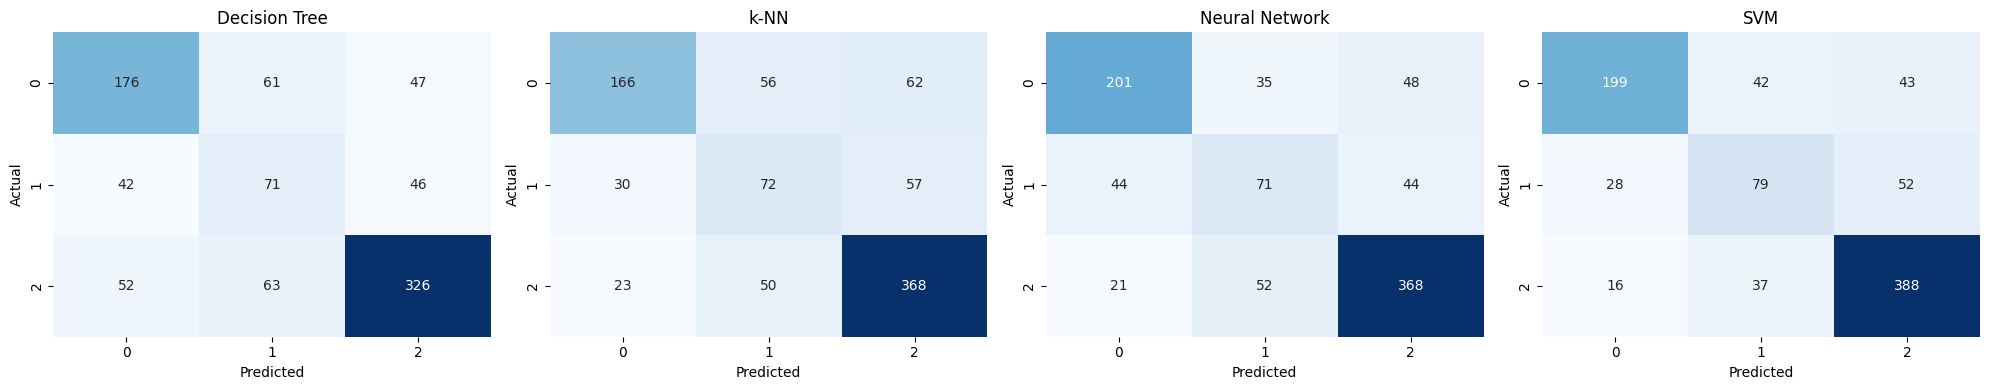

In [178]:
fig, axes = plt.subplots(1, len(results), figsize=(5 * len(results), 4))
for ax, res in zip(axes, results):
    sns.heatmap(
        res["Confusion Matrix"],
        annot=True, fmt="d", ax=ax, cmap="Blues", cbar=False
    )
    ax.set_title(res["Model"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [179]:
for res in results:
    print(f"\n=== {res['Model']} Classification Report ===")
    y_pred = models[res["Model"]].predict(X_test)
    print(classification_report(y_test, y_pred, target_names=enc.classes_))


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

     Dropout       0.65      0.62      0.64       284
    Enrolled       0.36      0.45      0.40       159
    Graduate       0.78      0.74      0.76       441

    accuracy                           0.65       884
   macro avg       0.60      0.60      0.60       884
weighted avg       0.66      0.65      0.65       884


=== k-NN Classification Report ===
              precision    recall  f1-score   support

     Dropout       0.76      0.58      0.66       284
    Enrolled       0.40      0.45      0.43       159
    Graduate       0.76      0.83      0.79       441

    accuracy                           0.69       884
   macro avg       0.64      0.62      0.63       884
weighted avg       0.69      0.69      0.68       884


=== Neural Network Classification Report ===
              precision    recall  f1-score   support

     Dropout       0.76      0.71      0.73       284
  